# Quantum teleportation. 


In [1]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.ignis.verification import marginal_counts
from qiskit.quantum_info import random_statevector
from qiskit.quantum_info.states import Statevector, partial_trace
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import matplotlib.pyplot as plotter
import numpy as np
from IPython.display import display, Math, Latex
%matplotlib inline


/var/folders/n5/sr7wwb8n1wggd7jsk_k37l_w0000gn/T/ipykernel_16513/1648348982.py:6: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.verification import marginal_counts


In [2]:
# Prepare the Qubit state to be trasferred. 
import math

qbits = QuantumRegister(3, name="qubits")
creg1 = ClassicalRegister(1, name="Creg1")
creg2 = ClassicalRegister(1, name="Creg2")
creg3 = ClassicalRegister(1, name="Creg3")

quantum_teleportation_circuit = QuantumCircuit(qbits, creg1, creg2, creg3)

initial_state = [math.sqrt(3)/2,1/2]   # Define initial_state as |1>
quantum_teleportation_circuit.initialize(initial_state, 0)
# quantum_teleportation_circuit.x(0)

quantum_teleportation_circuit.h(0)
quantum_teleportation_circuit.barrier()


# Prepare Bell states

In [3]:
def create_bell_states(circuit, bit_1, bit_2):
    circuit.h(bit_1)
    circuit.cx(bit_1, bit_2)
    circuit.barrier(0,1,2, label="#1")


In [4]:
create_bell_states(quantum_teleportation_circuit, 1, 2)

In [5]:
# Alice prepare state for transfer. 

def alice_prepare_transfer(circuit, bit_1, bit_2):
    circuit.cx(bit_2, bit_1)
    circuit.h(bit_2)
    circuit.barrier(0,1,2, label="#2")

def alice_send(circuit, bit_1, bit_2):
    circuit.measure(0,bit_1)
    circuit.measure(1,bit_2)

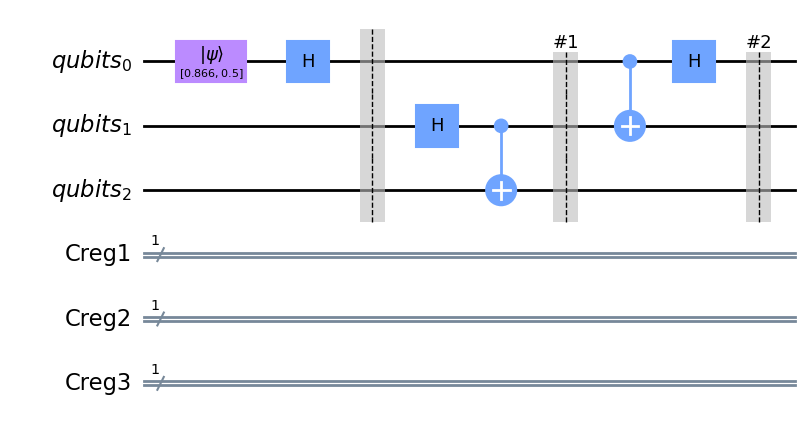

In [6]:
alice_prepare_transfer(quantum_teleportation_circuit, 1, 0)
quantum_teleportation_circuit.draw(output='mpl')

# Alice measure states

In [7]:
alice_send(quantum_teleportation_circuit, creg1, creg2)

In [8]:
# Bob's functions 

def bob_receive(circuit, qubit, cbit1, cbit2):
    circuit.x(qubit).c_if(cbit2, 1)
    circuit.z(qubit).c_if(cbit1, 1)
    circuit.h(qubit)
    

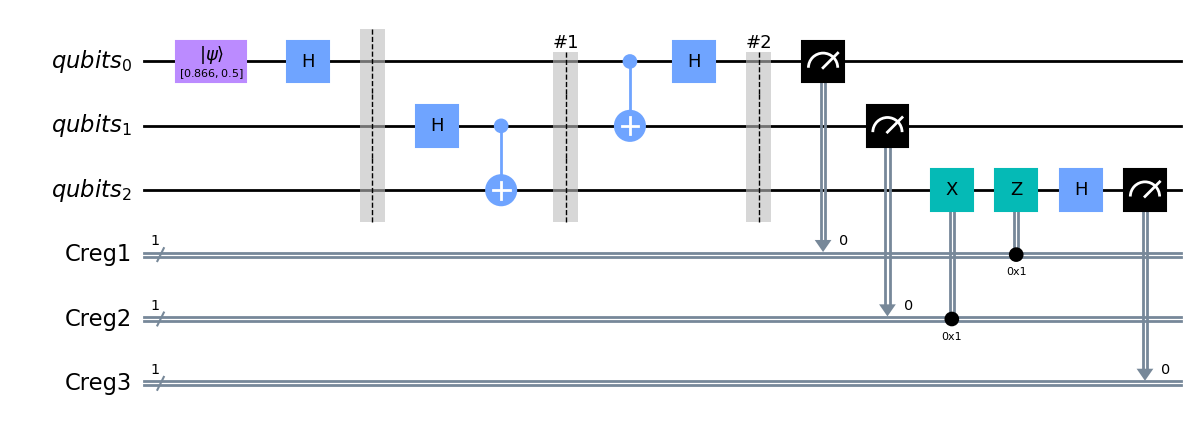

In [9]:
bob_receive(quantum_teleportation_circuit, 2, creg1, creg2)
quantum_teleportation_circuit.measure(2, creg3)
quantum_teleportation_circuit.draw(output='mpl')

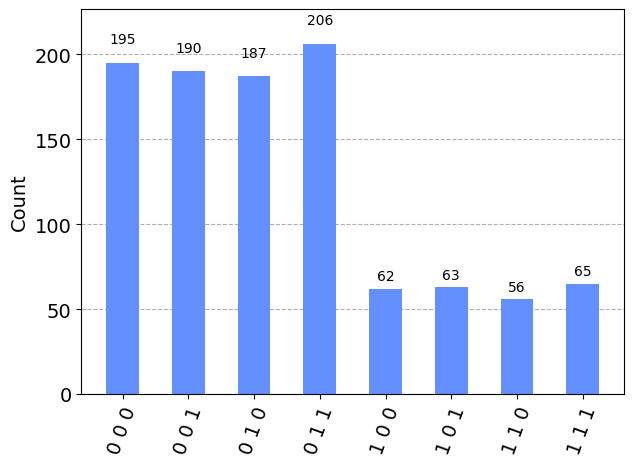

In [10]:
sim = Aer.get_backend('aer_simulator')
job = execute(quantum_teleportation_circuit, sim)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)